## Perceptron (single layer)
Note: Perceptron can be used for regression problem. Then, it becomes a linear regression

Similar to logistic regression, the only difference is the activation function and gradient calculation

### Training
- Initialization for both weights and bias
- Calculate the predictions use unit step function (y > 0 then 1 else 0)
- Calcaulte the gradient of weights and bias
- Update weights and bias

### Prediction
- Calculate the predictions use unit step function


### Test point
- Activation function
- Initialization
- When to use `np.dot` or `*`
- Partial derivatives  


In [2]:
import numpy as np

def unit_step_func(y):
    return np.where(y > 0, 1, 0) 

class Perceptron:
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.n_iters = n_iters 
        self.lr = lr
        self.activation_func = unit_step_func # Interesting way, so we can change activation func
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # initialize weights and bias 
        self.weights = np.zeros(n_features)
        self.bias = 0

        # update weights and bias 
        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias 
            predictions = self.activation_func(linear_pred)

            # for false positive, we do -lr*x; for false negative, we do +lr*x 
            # so the update -(y_pred-y) * x
            dw = (1/n_samples) * np.dot(X.T, (predictions - y)) # Same to the gradient of logistic regression calculation!
            db = (1/n_samples) * np.sum(predictions - y)

            self.weights -= self.lr * dw 
            self.bias -= self.lr * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias 
        prediction = self.activation_func(linear_pred)
        return prediction
        

Perceptron classification accuracy 0.9916666666666667


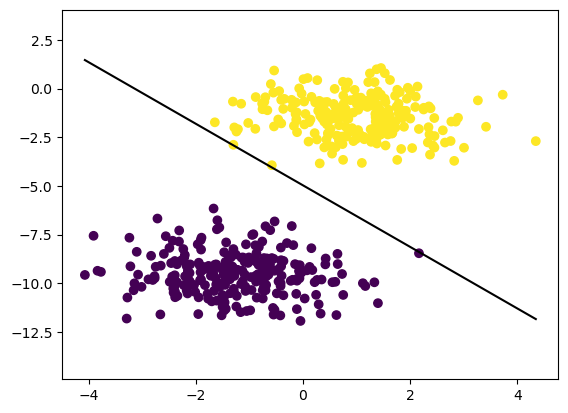

In [3]:
# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X, y = datasets.make_blobs(
        n_samples=600, n_features=2, centers=2, cluster_std=1.05, random_state=2
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    p = Perceptron(lr=0.01, n_iters=1000)
    p.fit(X_train, y_train)
    predictions = p.predict(X_test)

    print("Perceptron classification accuracy", accuracy(y_test, predictions))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.show()